### Produce a correlation plot for 20km radius pairs of gauges: FR, UC, HM, K, BV
### Transform P values to uniform on range [0,1] by ranking and dividing by the number of values (experiment with different ranking 'methods'
### Jitter P values to eliminate tied values (we want each value to be unique before ranking them)
### Transform separation distances using scipy distance_matrix (or spatial.distance.cdist) to get them into a form that will work with the RM code

In [1]:
import numpy as np
import pandas as pd
import math
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance_matrix
from scipy.optimize import curve_fit
from numpy import genfromtxt

### Read in P data for all 8 stations from csv file created in P_inputs_2005-2016.ipynb

In [2]:
# Use pd.read_csv to read csv file
P_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\Pinputs_2005-2016.csv",
                         index_col=0)
# drop KP, BCS and WH
P_df = P_df.drop(["KP_p_mm", "BCS_p_mm", "WH_p_mm"], axis=1)
# P_df

### Generate a set of random numbers to jitter the P ts data then add them to each column in the dataframe

In [3]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html
jitter = np.random.default_rng().uniform(0, 0.0001, 4019) # random numbers are in range 0 to 0.0001
# jitter
P_df['jitter'] = np.array(jitter)
# P_df
P_df['FR_p_mm_jit'] = P_df['FR_p_mm'] + P_df['jitter']
P_df['UC_p_mm_jit'] = P_df['UC_p_mm'] + P_df['jitter']
P_df['HM_p_mm_jit'] = P_df['HM_p_mm'] + P_df['jitter']
P_df['K_p_mm_jit'] = P_df['K_p_mm'] + P_df['jitter']
P_df['BV_p_mm_jit'] = P_df['BV_p_mm'] + P_df['jitter']
P_df

,FR_p_mm,UC_p_mm,HM_p_mm,K_p_mm,BV_p_mm,jitter,FR_p_mm_jit,UC_p_mm_jit,HM_p_mm_jit,K_p_mm_jit,BV_p_mm_jit
date,,,,,,,,,,,
2005-10-01,16.0160,11.3028,7.3722,0.0,10.4,0.000004,16.016004,11.302804,7.372204,0.000004,10.400004
2005-10-02,0.0000,0.0000,0.0000,0.4,0.0,0.000095,0.000095,0.000095,0.000095,0.400095,0.000095
2005-10-03,0.7649,0.5399,0.0000,1.2,0.2,0.000028,0.764928,0.539928,0.000028,1.200028,0.200028
2005-10-04,0.5463,0.3855,0.0000,0.0,0.4,0.000066,0.546366,0.385566,0.000066,0.000066,0.400066
2005-10-05,0.0896,0.0633,0.0000,0.0,0.0,0.000021,0.089621,0.063321,0.000021,0.000021,0.000021
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-27,0.9676,0.0000,0.0000,0.0,0.0,0.000014,0.967614,0.000014,0.000014,0.000014,0.000014
2016-09-28,0.0894,0.0000,0.0000,0.0,0.0,0.000086,0.089486,0.000086,0.000086,0.000086,0.000086
2016-09-29,0.0000,0.0000,0.0000,0.0,0.0,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007


### Transform P values for each station to uniform values on range 0 to 1. Version 1: don't specify method

In [4]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rankdata.html
P_df["FR_p_unijit"] = (st.rankdata(P_df.FR_p_mm_jit) - 0.5) / (len(P_df))
P_df["UC_p_unijit"] = (st.rankdata(P_df.UC_p_mm_jit) - 0.5) / (len(P_df))
P_df["HM_p_unijit"] = (st.rankdata(P_df.HM_p_mm_jit) - 0.5) / (len(P_df))
P_df["K_p_unijit"] = (st.rankdata(P_df.K_p_mm_jit) - 0.5) / (len(P_df))
P_df["BV_p_unijit"] = (st.rankdata(P_df.BV_p_mm_jit) - 0.5) / (len(P_df))
P_df

,FR_p_mm,UC_p_mm,HM_p_mm,K_p_mm,BV_p_mm,jitter,FR_p_mm_jit,UC_p_mm_jit,HM_p_mm_jit,K_p_mm_jit,BV_p_mm_jit,FR_p_unijit,UC_p_unijit,HM_p_unijit,K_p_unijit,BV_p_unijit
date,,,,,,,,,,,,,,,,
2005-10-01,16.0160,11.3028,7.3722,0.0,10.4,0.000004,16.016004,11.302804,7.372204,0.000004,10.400004,0.957079,0.957328,0.945633,0.027494,0.920254
2005-10-02,0.0000,0.0000,0.0000,0.4,0.0,0.000095,0.000095,0.000095,0.000095,0.400095,0.000095,0.402961,0.447997,0.552252,0.713237,0.547524
2005-10-03,0.7649,0.5399,0.0000,1.2,0.2,0.000028,0.764928,0.539928,0.000028,1.200028,0.200028,0.608236,0.659990,0.153396,0.763250,0.587335
2005-10-04,0.5463,0.3855,0.0000,0.0,0.4,0.000066,0.546366,0.385566,0.000066,0.000066,0.400066,0.575392,0.632620,0.375093,0.441528,0.631625
2005-10-05,0.0896,0.0633,0.0000,0.0,0.0,0.000021,0.089621,0.063321,0.000021,0.000021,0.000021,0.435307,0.481587,0.114830,0.140209,0.117069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-27,0.9676,0.0000,0.0000,0.0,0.0,0.000014,0.967614,0.000014,0.000014,0.000014,0.000014,0.627644,0.055362,0.069793,0.088206,0.072033
2016-09-28,0.0894,0.0000,0.0000,0.0,0.0,0.000086,0.089486,0.000086,0.000086,0.000086,0.000086,0.435058,0.402463,0.494775,0.579622,0.492784
2016-09-29,0.0000,0.0000,0.0000,0.0,0.0,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.025753,0.029734,0.038194,0.047151,0.038442


In [5]:
# have a look at max and min ranked values
print("FR_p_uniform max = ", round(P_df.FR_p_unijit.max(), 5))
print("FR_p_uniform min = ", round(P_df.FR_p_unijit.min(), 5))
print("UC_p_uniform max = ", round(P_df.UC_p_unijit.max(), 5))
print("UC_p_uniform min = ", round(P_df.UC_p_unijit.min(), 5))
print("HM_p_uniform max = ", round(P_df.HM_p_unijit.max(), 5))
print("HM_p_uniform min = ", round(P_df.HM_p_unijit.min(), 5))
print("K_p_uniform max = ", round(P_df.K_p_unijit.max(), 5))
print("K_p_uniform min = ", round(P_df.K_p_unijit.min(), 5))
print("BV_p_uniform max = ", round(P_df.BV_p_unijit.max(), 5))
print("BV_p_uniform min = ", round(P_df.BV_p_unijit.min(), 5))

FR_p_uniform max =  0.99988
FR_p_uniform min =  0.00012
UC_p_uniform max =  0.99988
UC_p_uniform min =  0.00012
HM_p_uniform max =  0.99988
HM_p_uniform min =  0.00012
K_p_uniform max =  0.99988
K_p_uniform min =  0.00012
BV_p_uniform max =  0.99988
BV_p_uniform min =  0.00012


### Calculate correlation for each gauge pair

### Pair 1: Fisera Ridge (2325 m) & Upper Clearing (1845 m)

In [6]:
FRUCcorr = P_df["FR_p_unijit"].corr(P_df["UC_p_unijit"])
print("FRUCcorr = ", FRUCcorr.round(5))
# P_df.plot.scatter(x='FR_p_uniform', y='UC_p_uniform', c='tab:blue',
#                                title="Fisera Ridge (2325 m) v Upper Clearing (1846 m)")
#                                label="FR v UC corr = 0.0675")
# plt.grid()
# plt.xlabel("Fisera Ridge uniform P")
# plt.ylabel("Upper Clearing uniform P")
# plt.show()
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRUCcorr2005-16.png')

FRUCcorr =  0.88612


### Pair 2: Fisera Ridge (2325 m) & Hay Meadow (1436 m)

In [7]:
FRHMcorr = P_df["FR_p_unijit"].corr(P_df["HM_p_unijit"])
print("FRHMcorr = ", FRHMcorr.round(5))
# P_df.plot.scatter(x='FR_p_mm', y='HM_p_mm', c='tab:orange',
#                                title="Fisera Ridge (2325 m) v Hay Meadow (1436 m)",
#                                label="FR v HM corr coeff = 0.0528")
# plt.grid()
# plt.xlabel("Fisera Ridge P (mm/d)")
# plt.ylabel("Hay Meadow P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRHMcorr2005-16.png')

FRHMcorr =  0.71934


### Pair 3: Fisera Ridge (2325 m) & Kananaskis (1391 m)

In [8]:
FRKcorr = P_df["FR_p_unijit"].corr(P_df["K_p_unijit"])
print("FRKcorr = ", FRKcorr.round(5))
# P_df.plot.scatter(x='FR_p_mm', y='K_p_mm', c='tab:brown',
#                                title="Fisera Ridge (2325 m) v Kananaskis (1391 m)",
#                                label="FR v K corr coeff = 0.599")
# plt.grid()
# plt.xlabel("Fisera Ridge P (mm/d)")
# plt.ylabel("Kananaskis P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRKcorr2005-16.png')


FRKcorr =  0.52482


### Pair 4: Fisera Ridge (2325 m) & Bow Valley (1298 m)

In [9]:
FRBVcorr = P_df["FR_p_unijit"].corr(P_df["BV_p_unijit"])
print("FRBVcorr = ", FRBVcorr.round(5))
# P_df.plot.scatter(x='FR_p_mm', y='BV_p_mm', c='tab:green',
#                                title="Fisera Ridge (2325 m) v Bow Valley (1298 m)",
#                                label="FR v BV corr coeff = 0.679")
# plt.grid()
# plt.xlabel("Fisera Ridge P (mm/d)")
# plt.ylabel("Bow Valley P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRBVcorr2005-16.png')

FRBVcorr =  0.53838


### Pair 8: Upper Clearing (1845 m) & Hay Meadow (1436 m)

In [10]:
UCHMcorr = P_df["UC_p_unijit"].corr(P_df["HM_p_unijit"])
print("UCHMcorr = ", UCHMcorr.round(5))
# P_df.plot.scatter(x='UC_p_mm', y='HM_p_mm', c='tab:gray',
#                                title="Upper Clearing (1845 m) v Hay Meadow (1436 m)",
#                                label="UC v HM corr coeff = 0.946")
# plt.grid()
# plt.xlabel("Upper Clearing P (mm/d)")
# plt.ylabel("Hay Meadow P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\UCHMcorr2005-16.png')

UCHMcorr =  0.78205


### Pair 9: Upper Clearing (1845 m) & Kananaskis (1391 m)

In [11]:
UCKcorr = P_df["UC_p_unijit"].corr(P_df["K_p_unijit"])
print("UCKcorr = ", UCKcorr.round(5))
# P_df.plot.scatter(x='UC_p_mm', y='K_p_mm', c='tab:olive',
#                                title="Upper Clearing (1845 m) v Kananaskis (1391 m)",
#                                label="UC v K corr coeff = 0.637")
# plt.grid()
# plt.xlabel("Upper Clearing P (mm/d)")
# plt.ylabel("Kananaskis P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\UCKcorr2005-16.png')

UCKcorr =  0.56482


### Pair 10: Upper Clearing (1845 m) & Bow Valley (1298 m)

In [12]:
UCBVcorr = P_df["UC_p_unijit"].corr(P_df["BV_p_unijit"])
print("UCBVcorr = ", UCBVcorr.round(5))
# P_df.plot.scatter(x='UC_p_mm', y='BV_p_mm', c='tab:cyan',
#                                title="Upper Clearing (1845 m) v Bow Valley (1298 m)",
#                                label="UC v BV corr coeff = 0.761")
# plt.grid()
# plt.xlabel("Upper Clearing P (mm/d)")
# plt.ylabel("Bow Valley P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\UCBVcorr2005-16.png')

UCBVcorr =  0.59377


### Pair 14: Hay Meadow (1436 m) & Kananaskis (1391 m)

In [13]:
HMKcorr = P_df["HM_p_unijit"].corr(P_df["K_p_unijit"])
print("HMKcorr = ", HMKcorr.round(5))
# P_df.plot.scatter(x='HM_p_mm', y='K_p_mm', c='goldenrod',
#                                title="Hay Meadow (1426 m) v Kananaskis (1391 m)",
#                                label="HM v K corr coeff = 0.651")
# plt.grid()
# plt.xlabel("Hay Meadow P (mm/d)")
# plt.ylabel("Kananaskis P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\HMKcorr2005-16.png')

HMKcorr =  0.58289


### Pair 15: Hay Meadow (1436 m) & Bow Valley (1298 m)

In [14]:
HMBVcorr = P_df["HM_p_unijit"].corr(P_df["BV_p_unijit"])
print("HMBVcorr = ", HMBVcorr.round(5))
# P_df.plot.scatter(x='HM_p_mm', y='BV_p_mm', c='olive',
#                                title="Hay Meadow (1426 m) v Bow Valley (1298 m)",
#                                label="HM v BV corr coeff = 0.764")
# plt.grid()
# plt.xlabel("Hay Meadow P (mm/d)")
# plt.ylabel("Bow Valley P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\HMBVcorr2005-16.png')

HMBVcorr =  0.58819


### Pair 19: Kananaskis (1391 m) & Bow Valley (1298 m)

In [15]:
KBVcorr = P_df["K_p_unijit"].corr(P_df["BV_p_unijit"])
print("KBVcorr = ", KBVcorr.round(5))
# P_df.plot.scatter(x='K_p_mm', y='BV_p_mm', c='steelblue',
#                                title="Kananaskis (1391 m) v Bow Valley (1298 m)",
#                                label="K v BV corr coeff = 0.682")
# plt.grid()
# plt.xlabel("Kananaskis P (mm/d)")
# plt.ylabel("Bow Valley P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\KBVcorr2005-16.png')

KBVcorr =  0.57308


### Print all correlation values

In [16]:
print("Fisera Ridge Upper Clearing correlation =", FRUCcorr.round(5))
print("Fisera Ridge Hay Meadow correlation =", FRHMcorr.round(5))
print("Fisera Ridge Kananaskis correlation =", FRKcorr.round(5))
print("Fisera Ridge Bow Valley correlation =", FRBVcorr.round(5))
print("Upper Clearing Hay Meadow correlation =", UCHMcorr.round(5))
print("Upper Clearing Kananaskis correlation =", UCKcorr.round(5))
print("Upper Clearing Bow Valley correlation =", UCBVcorr.round(5))
print("Hay Meadow Kananaskis correlation =", HMKcorr.round(5))
print("Hay Meadow Bow Valley correlation =", HMBVcorr.round(5))
print("Kananaskis Bow Valley correlation =", KBVcorr.round(5))

Fisera Ridge Upper Clearing correlation = 0.88612
Fisera Ridge Hay Meadow correlation = 0.71934
Fisera Ridge Kananaskis correlation = 0.52482
Fisera Ridge Bow Valley correlation = 0.53838
Upper Clearing Hay Meadow correlation = 0.78205
Upper Clearing Kananaskis correlation = 0.56482
Upper Clearing Bow Valley correlation = 0.59377
Hay Meadow Kananaskis correlation = 0.58289
Hay Meadow Bow Valley correlation = 0.58819
Kananaskis Bow Valley correlation = 0.57308


### Use scipy.stats distance_matrix to calculate separation distances between stations. 

### Method 1: use standard xy grid coords from run_inv_mcrb.py

In [17]:
# standard xy grid coords from run_inv_mcrb.py
coords = [[69, 53], [72, 93], [45, 136], [235, 287], [357, 239]]
stations = ["Fisera Ridge", "Upper Clearing", "Hay Meadow", "Kananaskis", "Bow Valley"]
dist_df = pd.DataFrame(coords, columns = ["std grid x", "std grid y"], index = stations)
dist_df

,std grid x,std grid y
Fisera Ridge,69,53
Upper Clearing,72,93
Hay Meadow,45,136
Kananaskis,235,287
Bow Valley,357,239


### Method 2: use eastings and northings from MCRB_Pinputs_20km.csv

In [18]:
# # easting and northing coords from MCRB_Pinputs_20km.csv
# coords = [[626132, 5646467], [628147, 5646573], [630745, 5645258], [635104, 5654649], [635410, 5660866]]
# stations = ["Fisera Ridge", "Upper Clearing", "Hay Meadow", "Kananaskis", "Bow Valley"]
# dist_df = pd.DataFrame(coords, columns = ["std grid x", "std grid y"], index = stations)
# dist_df

### Calculate the distance matrix

In [19]:
distmatrix_df = pd.DataFrame(distance_matrix(dist_df.values, dist_df.values), index=dist_df.index, columns=dist_df.index)
distmatrix_df

,Fisera Ridge,Upper Clearing,Hay Meadow,Kananaskis,Bow Valley
Fisera Ridge,0.000000,40.112342,86.400231,286.900680,342.841071
Upper Clearing,40.112342,0.000000,50.774009,253.387056,320.220237
Hay Meadow,86.400231,50.774009,0.000000,242.695282,328.562018
Kananaskis,286.900680,253.387056,242.695282,0.000000,131.103013
Bow Valley,342.841071,320.220237,328.562018,131.103013,0.000000


### Get the separation distances from the matrix

In [20]:
FRUCdist = distmatrix_df.iloc[0, 1]
FRHMdist = distmatrix_df.iloc[0, 2]
FRKdist = distmatrix_df.iloc[0, 3]
FRBVdist = distmatrix_df.iloc[0, 4]
UCHMdist = distmatrix_df.iloc[1, 2]
UCKdist = distmatrix_df.iloc[1, 3]
UCBVdist = distmatrix_df.iloc[1, 4]
HMKdist = distmatrix_df.iloc[2, 3]
HMBVdist = distmatrix_df.iloc[2, 4]
KBVdist = distmatrix_df.iloc[3, 4]

print("FRUC sep dist = ", FRUCdist)
print("FRHM sep dist = ", FRHMdist)
print("FRK sep dist = ", FRKdist)
print("FRBV sep dist = ", FRBVdist)
print("UCHM sep dist = ", UCHMdist)
print("UCK sep dist = ", UCKdist)
print("UCBV sep dist = ", UCBVdist)
print("HMK sep dist = ", HMKdist)
print("HMBV sep dist = ", HMBVdist)
print("KBV sep dist = ", KBVdist)

FRUC sep dist =  40.11234224026316
FRHM sep dist =  86.40023148117139
FRK sep dist =  286.9006796785257
FRBV sep dist =  342.8410710518797
UCHM sep dist =  50.774009099144415
UCK sep dist =  253.38705570727168
UCBV sep dist =  320.22023671217283
HMK sep dist =  242.69528219559604
HMBV sep dist =  328.5620184987912
KBV sep dist =  131.10301293257908


### Create a dataframe

In [21]:
# step 1: initialise my lists
corr = [["FRUC", FRUCdist, FRUCcorr], ["FRHM", FRHMdist, FRHMcorr], ["FRK", FRKdist, FRKcorr],
       ["FRBV", FRBVdist, FRBVcorr], ["UCHM", UCHMdist, UCHMcorr], ["UCK", UCKdist, UCKcorr],
       ["UCBV", UCBVdist, UCBVcorr], ["HMK", HMKdist, HMKcorr], ["HMBV", HMBVdist, HMBVcorr],
       ["KBV", KBVdist, KBVcorr.round(5)]]
corr

[['FRUC', 40.11234224026316, 0.8861217408804649],
 ['FRHM', 86.40023148117139, 0.7193385707171266],
 ['FRK', 286.9006796785257, 0.5248183573513652],
 ['FRBV', 342.8410710518797, 0.5383793316449658],
 ['UCHM', 50.774009099144415, 0.7820478319536623],
 ['UCK', 253.38705570727168, 0.5648184823491798],
 ['UCBV', 320.22023671217283, 0.5937744714485793],
 ['HMK', 242.69528219559604, 0.5828886372784629],
 ['HMBV', 328.5620184987912, 0.5881939619374852],
 ['KBV', 131.10301293257908, 0.57308]]

In [22]:
# step 2: create df from lists
correlation_df = pd.DataFrame(corr, columns = ["station_pair", "separation_distance", "correlation"])
correlation_df.set_index("station_pair", inplace=True)
# correlation_df

In [23]:
# sort by separation distance
correlation_df.sort_values(by=['separation_distance'], inplace=True, ascending=True)
# write to csv
correlation_df.to_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation\correlation_jittered_20km_stns.csv")

In [24]:
correlation_df

,separation_distance,correlation
station_pair,,
FRUC,40.112342,0.886122
UCHM,50.774009,0.782048
FRHM,86.400231,0.719339
KBV,131.103013,0.573080
HMK,242.695282,0.582889
UCK,253.387056,0.564818
FRK,286.900680,0.524818
UCBV,320.220237,0.593774
HMBV,328.562018,0.588194


### Scatter plot correlation against separation distance

In [25]:
# reset df index to get access to station_pair column
correlation_df = correlation_df.reset_index()
# correlation_df

<function matplotlib.pyplot.show(close=None, block=None)>

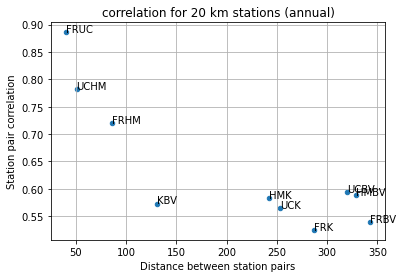

In [26]:
# basic plot
correlation_df.plot.scatter(x='separation_distance', y='correlation', c='tab:blue',
                               title="correlation for 20 km stations (annual)")
plt.grid()
plt.xlabel("Distance between station pairs")
plt.ylabel("Station pair correlation")
# plt.xlim(0, 800)
# plt.ylim(0.02, 0.08)
# plot labels on points
for i, txt in enumerate(correlation_df.station_pair):
    plt.annotate(txt, (correlation_df.separation_distance.iat[i], correlation_df.correlation.iat[i]))
plt.show
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation\correlation_20km_stns.png')

### Fit an exponential curve to the correlation data

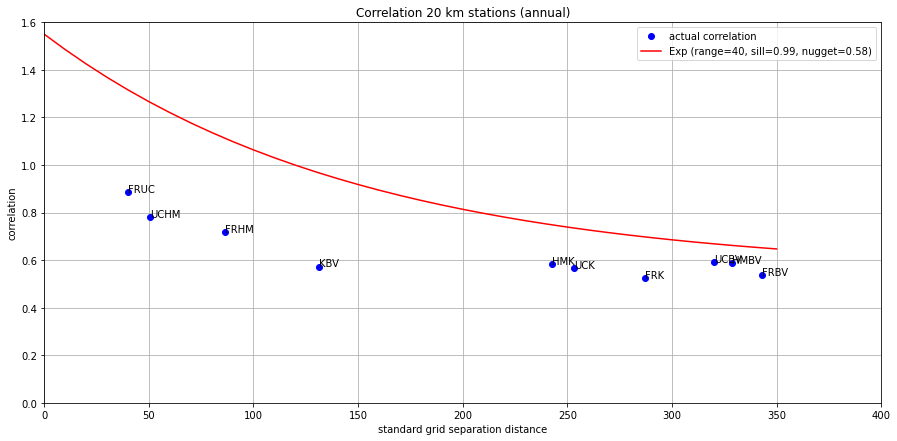

In [32]:
# use type_exp function from covariancefunction.py
# create a range of separation distances from 0 to 350
distarr = np.arange(0, 360, 10)
# set parameter values for exponential curve fitting
Range = 150
Sill = 1.0 # y-intercept estimated by eye from the plotted cov values - nugget
nugget = 0.55

# actual values from dataframe
x = correlation_df.separation_distance.values
y = correlation_df.correlation.values

# create a function that loops through sepdist values and calculates an estimated covariance for each
def type_exp(): 
    corrlist = [] # empty list for estimated correlation values from exponential function
    for h in distarr:    
        expfit = Sill * (np.exp(-h/Range) + nugget) # fit exponential curve
        corrlist.append(expfit) # append covariance values to the list
    return corrlist

# create array of exponential curve estimated covariance values
yexp = np.array(type_exp())
    
# plot actual covariance values
plt.figure(figsize=(15, 7))
plt.plot(x, y, 'bo', label="actual correlation")
# plot exponential curve values
plt.plot(distarr, yexp, 'r', label="Exp (range=40, sill=0.99, nugget=0.58)")
# plotting
plt.title("Correlation 20 km stations (annual)")
plt.xlabel('standard grid separation distance')
plt.ylabel('correlation')
plt.legend()
plt.xlim(0, 400)
plt.ylim(0, 1.6)
plt.grid()

# reset df index to get access to station_pair column
# correlation_df = correlation_df.reset_index()

# plot labels on points
for i, txt in enumerate(correlation_df.station_pair):
    plt.annotate(txt, (correlation_df.separation_distance.iat[i], correlation_df.correlation.iat[i]))
plt.show()
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation\correlation_jittered.png')

# print("sepdist = ", sepdist)
# print("h = ", h)
# print("yexp = ", yexp)

### From observation of the fig above, it looks like we have: nugget=0.55, sill=1.55 (not realistic, make it 1.0), range=150. However, this gives a really poor fit. So, experiment with nugget, sill and range vals to get a better fit.

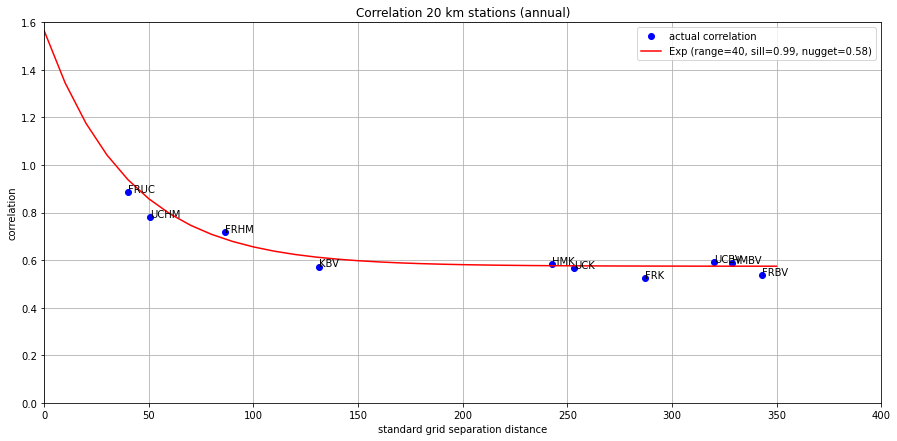

In [33]:
# use type_exp function from covariancefunction.py
# create a range of separation distances from 0 to 350
distarr = np.arange(0, 360, 10)
# set parameter values for exponential curve fitting
Range = 40
Sill = 0.99 # y-intercept estimated by eye from the plotted cov values - nugget
nugget = 0.58

# actual values from dataframe
x = correlation_df.separation_distance.values
y = correlation_df.correlation.values

# create a function that loops through sepdist values and calculates an estimated covariance for each
def type_exp(): 
    corrlist = [] # empty list for estimated correlation values from exponential function
    for h in distarr:    
        expfit = Sill * (np.exp(-h/Range) + nugget) # fit exponential curve
        corrlist.append(expfit) # append covariance values to the list
    return corrlist

# create array of exponential curve estimated covariance values
yexp = np.array(type_exp())
    
# plot actual covariance values
plt.figure(figsize=(15, 7))
plt.plot(x, y, 'bo', label="actual correlation")
# plot exponential curve values
plt.plot(distarr, yexp, 'r', label="Exp (range=40, sill=0.99, nugget=0.58)")
# plotting
plt.title("Correlation 20 km stations (annual)")
plt.xlabel('standard grid separation distance')
plt.ylabel('correlation')
plt.legend()
plt.xlim(0, 400)
plt.ylim(0, 1.6)
plt.grid()

# reset df index to get access to station_pair column
# correlation_df = correlation_df.reset_index()

# plot labels on points
for i, txt in enumerate(correlation_df.station_pair):
    plt.annotate(txt, (correlation_df.separation_distance.iat[i], correlation_df.correlation.iat[i]))
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation\correlation_jittered.png')